## Урок 1. Алгоритм линейной регрессии. Градиентный спуск

In [1]:
import numpy as np
import matplotlib.pyplot as plt

__Задача:__ предсказание баллов ЕГЭ ученика в зависимости от кол-ва лет стажа его репетитора

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  5,  3,  0,  5, 10,  1,  2]])

In [3]:
X.shape

(2, 10)

In [4]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Уравнение прямой: $y = a*x + b$

In [5]:
y_pred1 = 35 * np.ones(10) + X[1]*5
y_pred2 = 40 * np.ones(10) + X[1]*7.5

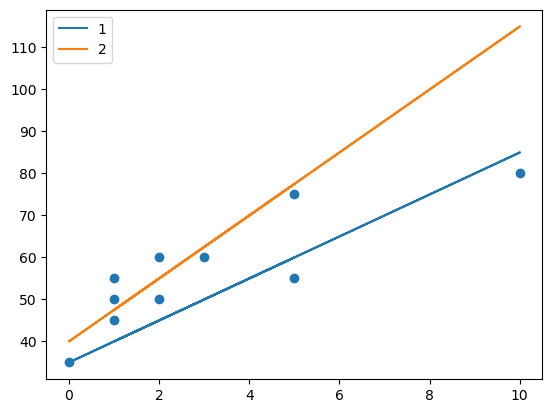

In [6]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1')
plt.plot(X[1], y_pred2, label='2')
plt.legend()
plt.show()

Простая ошибка

In [7]:
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)
err1, err2

(65.0, -60.0)

MAE (Mean Absolute Error)

In [8]:
mae_1 = np.sum(np.abs(y - y_pred1)) / 10
mae_2 = np.sum(np.abs(y - y_pred2)) / 10
mae_1, mae_2

(8.5, 9.0)

MSE (Mean Squared Error)

In [9]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_1, mse_2

(97.5, 188.75)

Метод наименьших квадратов (МНК)

In [10]:
X.shape

(2, 10)

In [11]:
X.T.shape

(10, 2)

In [12]:
all(X @ y == np.dot(X,y))

True

In [13]:
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y
W

array([45.0625,  3.8125])

In [14]:
y_pred3 = W[0] * X[0] + W[1] * X[1]

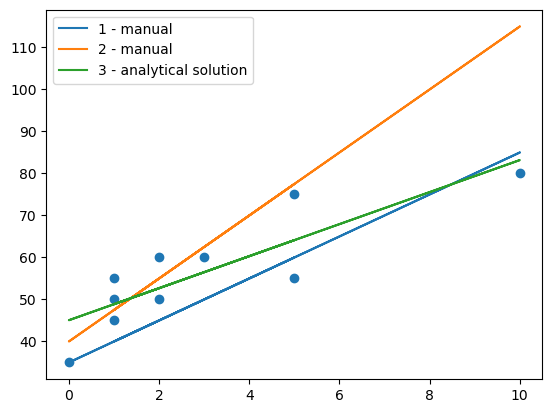

In [15]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1 - manual')
plt.plot(X[1], y_pred2, label='2 - manual')
plt.plot(X[1], y_pred3, label='3 - analytical solution')
plt.legend()
plt.show()

In [16]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err

In [17]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

(8.5, 97.5)

In [18]:
calc_mae(y, y_pred2), calc_mse(y, y_pred2)

(9.0, 188.75)

In [19]:
calc_mae(y, y_pred3), calc_mse(y, y_pred3)

(5.7875, 43.96875)

Градиентный спуск

In [20]:
n = 10
Q = 1/n * np.sum((y_pred3 - y)**2) # функционал ошибки, y = X*w

In [21]:
alpha = 1e-2 # величина шага
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [22]:
W[0], W[0] - g

(45.0625, 45.29125)

### Д/З

1. Подберите скорость обучения (alpha) и количество итераций

In [23]:
alpha = 0.01  # Initial learning rate
N_iter = 1000  # Initial number of iterations

print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(N_iter):
    y_pred = np.dot(W, X)
    err = np.mean((y_pred - y)**2)  
    for k in range(W.shape[0]):
        W[k] -= alpha * np.mean((y_pred - y) * X[k])  
    if i % 10 == 0:
        alpha /= 1.1  
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')


Number of objects = 10        
Learning rate = 0.01        
Initial weights = [45.0625  3.8125] 

Iteration #0: W_new = [45.0625  3.8125], MSE = 43.97
Iteration #10: W_new = [45.0625  3.8125], MSE = 43.97
Iteration #20: W_new = [45.0625  3.8125], MSE = 43.97
Iteration #30: W_new = [45.0625  3.8125], MSE = 43.97
Iteration #40: W_new = [45.0625  3.8125], MSE = 43.97
Iteration #50: W_new = [45.0625  3.8125], MSE = 43.97
Iteration #60: W_new = [45.0625  3.8125], MSE = 43.97
Iteration #70: W_new = [45.0625  3.8125], MSE = 43.97
Iteration #80: W_new = [45.0625  3.8125], MSE = 43.97
Iteration #90: W_new = [45.0625  3.8125], MSE = 43.97
Iteration #100: W_new = [45.0625  3.8125], MSE = 43.97
Iteration #110: W_new = [45.0625  3.8125], MSE = 43.97
Iteration #120: W_new = [45.0625  3.8125], MSE = 43.97
Iteration #130: W_new = [45.0625  3.8125], MSE = 43.97
Iteration #140: W_new = [45.0625  3.8125], MSE = 43.97
Iteration #150: W_new = [45.0625  3.8125], MSE = 43.97
Iteration #160: W_new = [45.0625 

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [24]:
n = X.shape[0]

W = np.array([1, 0.5])

alpha = 0.01
N_iter = 1000

print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(N_iter):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y)))
    W_pred = W
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 2        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [25.25 24.75], MSE = 3047.75
Iteration #10: W_new = [420.27898068 419.77898068], MSE = 2050687.63
Iteration #20: W_new = [11846.67613204 11846.17613204], MSE = 1715275255.62
Iteration #30: W_new = [342360.53269529 342360.03269529], MSE = 1435140382808.23
Iteration #40: W_new = [9902627.68719454 9902627.18719454], MSE = 1200756920700091.5
Iteration #50: W_new = [2.86437805e+08 2.86437805e+08], MSE = 1.0046523674476397e+18
Iteration #60: W_new = [8.28534655e+09 8.28534655e+09], MSE = 8.405751089322615e+20
Iteration #70: W_new = [2.39657505e+11 2.39657505e+11], MSE = 7.03294529182811e+23
Iteration #80: W_new = [6.9322049e+12 6.9322049e+12], MSE = 5.884342630687287e+26
Iteration #90: W_new = [2.00517254e+14 2.00517254e+14], MSE = 4.9233268223423766e+29
Iteration #100: W_new = [5.8000549e+15 5.8000549e+15], MSE = 4.1192616611389805e+32
Iteration #110: W_new = [1.67769288e+17 1.6776

*3. Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога (упрощенный аналог параметра tol в линейной регрессии в sklearn).

In [25]:
n = X.shape[0]  

W = np.array([1, 0.5])

alpha = 0.01  
delta_err = 0.0001  
err_prev = float('inf') 

max_iter = 1000  
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(max_iter):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y)))
    
    if abs(err - err_prev) < delta_err:
        print(f'Stopping criteria met. Change in error below threshold.')
        break
    
    err_prev = err
    W_pred = W
    
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 2        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [25.25 24.75], MSE = 3047.75
Iteration #10: W_new = [420.27898068 419.77898068], MSE = 2050687.63
Iteration #20: W_new = [11846.67613204 11846.17613204], MSE = 1715275255.62
Iteration #30: W_new = [342360.53269529 342360.03269529], MSE = 1435140382808.23
Iteration #40: W_new = [9902627.68719454 9902627.18719454], MSE = 1200756920700091.5
Iteration #50: W_new = [2.86437805e+08 2.86437805e+08], MSE = 1.0046523674476397e+18
Iteration #60: W_new = [8.28534655e+09 8.28534655e+09], MSE = 8.405751089322615e+20
Iteration #70: W_new = [2.39657505e+11 2.39657505e+11], MSE = 7.03294529182811e+23
Iteration #80: W_new = [6.9322049e+12 6.9322049e+12], MSE = 5.884342630687287e+26
Iteration #90: W_new = [2.00517254e+14 2.00517254e+14], MSE = 4.9233268223423766e+29
Iteration #100: W_new = [5.8000549e+15 5.8000549e+15], MSE = 4.1192616611389805e+32
Iteration #110: W_new = [1.67769288e+17 1.6776